In [1]:
import numpy as np
import pandas as pd

from collections import defaultdict
from tqdm import tqdm

import random

import gym
import adaptive_tutor

In [2]:
import numpy as np
action_space = np.load('adaptive_tutor/action_space.npy', allow_pickle=True)

In [3]:
class TutorStatefulAgent:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate and an epsilon.

        Args:
            learning_rate: The learning rate
            initial_epsilon: The initial epsilon value
            epsilon_decay: The decay for epsilon
            final_epsilon: The final epsilon value
            discount_factor: The discount factor for computing the Q-value
        """

        self.action_space = list(np.load('adaptive_tutor/action_space.npy', allow_pickle=True))
        self.q_values = defaultdict(lambda: np.zeros(len(self.action_space)))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []

    def _create_rating_bracket(self, row):
        if row<1300:
            return 'lt_1300'
        elif 1300<=row<1500:
            return '1300-1500'
        elif 1500<=row<1700:
            return '1500-1700'
        else:
            return 'gt_1700'
    
    def _get_agent_state(self, obs):
        return tuple([self._create_rating_bracket(val) for val in obs['themes_covered']])

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment
        obs = self._get_agent_state(obs)
        if np.random.random() < self.epsilon:
            #print("Exploring")
            return random.choice(range(len(self.action_space)))

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return (np.argmax(self.q_values[obs]))

    def update(
        self,
        obs: tuple[int, int, bool],
        action: int,
        reward: float,
        terminated: bool,
        next_obs: tuple[int, int, bool],
    ):
        """Updates the Q-value of an action."""
        obs = self._get_agent_state(obs)
        next_obs = self._get_agent_state(next_obs)
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        temporal_difference = (
            reward + self.discount_factor * future_q_value - self.q_values[obs][action]
        )

        self.q_values[obs][action] = (
            self.q_values[obs][action] + self.lr * temporal_difference
        )
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)

In [4]:
# Hyperparameters
learning_rate = 0.01
n_episodes = 200
start_epsilon = 0.5
epsilon_decay = start_epsilon / (n_episodes / 2) # Reduce the exploration over time
final_epsilon = 0.1

agent = TutorStatefulAgent(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [5]:
# Load custom environment we created 
env = gym.make('adaptive_tutor/PuzzleTutorEnv-v0', render_mode=None) 

# Set to initial state
env.reset()

episode_rewards = []
episode_lengths = []

action_rewards = {action: 0 for action in action_space}

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False
    terminated = False
    episode_reward = 0
    
    # Play one episode
    step_counter = 0
    while not terminated:
        step_counter+=1
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        #print(action_space[action], reward)
        # Update the agent
        agent.update(obs, action, reward, terminated, next_obs)
        episode_reward += reward
        #print(action_space[action])
        # Update the current observation, and whether the environment is done
        done = terminated or truncated
        obs = next_obs
        action_rewards[action_space[action]] += reward
    
    print("Number of steps: ", step_counter)

    episode_rewards.append(episode_reward)
    episode_lengths.append(step_counter)
    print(f"Episode {episode + 1}: Reward = {episode_reward}, Length = {step_counter}")


    agent.decay_epsilon()

../maia_weights/maia_1100.pb
1
../maia_weights/maia_1100.pb
1


  0%|          | 0/200 [00:00<?, ?it/s]<UciProtocol (pid=2451)>: stderr >>        _
<UciProtocol (pid=2451)>: stderr >> |   _ | |
<UciProtocol (pid=2451)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=2451)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=2451)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=2451)>: stderr >> Initialized metal backend on device Apple M2


../maia_weights/maia_1100.pb
1


/Users/chitvangoyal/anaconda3/envs/rl_chess/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/chitvangoyal/anaconda3/envs/rl_chess/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded
../maia_Weights/maia_1700.pb
4
Bot_Upgraded


In [5]:
# Load custom environment we created 
env = gym.make('adaptive_tutor/PuzzleTutorEnv-v0', render_mode=None) 

# Set to initial state
env.reset()

episode_rewards = []
episode_lengths = []

action_rewards = {action: 0 for action in action_space}

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False
    terminated = False
    episode_reward = 0
    
    # Play one episode
    step_counter = 0
    while not terminated:
        step_counter+=1
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)
        #print(action_space[action], reward)
        # Update the agent
        agent.update(obs, action, reward, terminated, next_obs)
        episode_reward += reward
        #print(action_space[action])
        # Update the current observation, and whether the environment is done
        done = terminated or truncated
        obs = next_obs
        action_rewards[action_space[action]] += reward
    
    print("Number of steps: ", step_counter)

    episode_rewards.append(episode_reward)
    episode_lengths.append(step_counter)
    print(f"Episode {episode + 1}: Reward = {episode_reward}, Length = {step_counter}")


    agent.decay_epsilon()

../maia_weights/maia_1100.pb
1
../maia_weights/maia_1100.pb
1


  0%|          | 0/100 [00:00<?, ?it/s]<UciProtocol (pid=57582)>: stderr >>        _
<UciProtocol (pid=57582)>: stderr >> |   _ | |
<UciProtocol (pid=57582)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57582)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57582)>: stderr >> Creating backend [metal]...


../maia_weights/maia_1100.pb
1


<UciProtocol (pid=57582)>: stderr >> Initialized metal backend on device Apple M2
/Users/chitvangoyal/anaconda3/envs/rl_chess/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


  1%|          | 1/100 [01:51<3:04:29, 111.82s/it]<UciProtocol (pid=57584)>: stderr >>        _
<UciProtocol (pid=57584)>: stderr >> |   _ | |
<UciProtocol (pid=57584)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57584)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57584)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57584)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  865
Episode 1: Reward = -1704.0763157894753, Length = 865
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


  2%|▏         | 2/100 [03:06<2:26:32, 89.72s/it] <UciProtocol (pid=57585)>: stderr >>        _
<UciProtocol (pid=57585)>: stderr >> |   _ | |
<UciProtocol (pid=57585)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57585)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57585)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57585)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  579
Episode 2: Reward = -1182.0215789473682, Length = 579
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


  3%|▎         | 3/100 [03:59<1:58:14, 73.14s/it]<UciProtocol (pid=57624)>: stderr >>        _
<UciProtocol (pid=57624)>: stderr >> |   _ | |
<UciProtocol (pid=57624)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57624)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57624)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57624)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  408
Episode 3: Reward = -831.75947368421, Length = 408
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


  4%|▍         | 4/100 [04:46<1:40:37, 62.89s/it]<UciProtocol (pid=57626)>: stderr >>        _
<UciProtocol (pid=57626)>: stderr >> |   _ | |
<UciProtocol (pid=57626)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57626)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57626)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57626)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  365
Episode 4: Reward = -744.6057894736842, Length = 365
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


  5%|▌         | 5/100 [05:53<1:41:58, 64.41s/it]<UciProtocol (pid=57628)>: stderr >>        _
<UciProtocol (pid=57628)>: stderr >> |   _ | |
<UciProtocol (pid=57628)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57628)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57628)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57628)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  515
Episode 5: Reward = -1023.8273684210511, Length = 515
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


  6%|▌         | 6/100 [06:25<1:23:34, 53.35s/it]<UciProtocol (pid=57629)>: stderr >>        _
<UciProtocol (pid=57629)>: stderr >> |   _ | |
<UciProtocol (pid=57629)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57629)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57629)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57629)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  254
Episode 6: Reward = -521.7163157894739, Length = 254
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


  7%|▋         | 7/100 [06:59<1:12:45, 46.94s/it]<UciProtocol (pid=57638)>: stderr >>        _
<UciProtocol (pid=57638)>: stderr >> |   _ | |
<UciProtocol (pid=57638)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57638)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57638)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57638)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  247
Episode 7: Reward = -513.8699999999998, Length = 247
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


  8%|▊         | 8/100 [07:44<1:11:04, 46.35s/it]<UciProtocol (pid=57646)>: stderr >>        _
<UciProtocol (pid=57646)>: stderr >> |   _ | |
<UciProtocol (pid=57646)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57646)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57646)>: stderr >> Creating backend [metal]...


Number of steps:  327
Episode 8: Reward = -659.334210526315, Length = 327
../maia_weights/maia_1100.pb
1


<UciProtocol (pid=57646)>: stderr >> Initialized metal backend on device Apple M2


../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


  9%|▉         | 9/100 [08:48<1:18:40, 51.88s/it]<UciProtocol (pid=57655)>: stderr >>        _
<UciProtocol (pid=57655)>: stderr >> |   _ | |
<UciProtocol (pid=57655)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57655)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57655)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57655)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  469
Episode 9: Reward = -934.407368421051, Length = 469
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 10%|█         | 10/100 [11:26<2:07:02, 84.69s/it]<UciProtocol (pid=57681)>: stderr >>        _
<UciProtocol (pid=57681)>: stderr >> |   _ | |
<UciProtocol (pid=57681)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57681)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57681)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57681)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  1211
Episode 10: Reward = -2375.5963157894707, Length = 1211
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 11%|█         | 11/100 [12:25<1:53:40, 76.64s/it]<UciProtocol (pid=57684)>: stderr >>        _
<UciProtocol (pid=57684)>: stderr >> |   _ | |
<UciProtocol (pid=57684)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57684)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57684)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57684)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  449
Episode 11: Reward = -887.5000000000006, Length = 449
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 12%|█▏        | 12/100 [13:22<1:43:59, 70.91s/it]<UciProtocol (pid=57695)>: stderr >>        _
<UciProtocol (pid=57695)>: stderr >> |   _ | |
<UciProtocol (pid=57695)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57695)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57695)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57695)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  419
Episode 12: Reward = -854.6389473684211, Length = 419
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 13%|█▎        | 13/100 [14:26<1:39:41, 68.75s/it]<UciProtocol (pid=57704)>: stderr >>        _
<UciProtocol (pid=57704)>: stderr >> |   _ | |
<UciProtocol (pid=57704)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57704)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57704)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57704)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  459
Episode 13: Reward = -939.5694736842102, Length = 459
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 14%|█▍        | 14/100 [15:42<1:41:38, 70.91s/it]<UciProtocol (pid=57746)>: stderr >>        _
<UciProtocol (pid=57746)>: stderr >> |   _ | |
<UciProtocol (pid=57746)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57746)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57746)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57746)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  549
Episode 14: Reward = -1093.449999999998, Length = 549
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 15%|█▌        | 15/100 [17:01<1:44:05, 73.48s/it]<UciProtocol (pid=57763)>: stderr >>        _
<UciProtocol (pid=57763)>: stderr >> |   _ | |
<UciProtocol (pid=57763)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57763)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57763)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57763)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  576
Episode 15: Reward = -1160.6289473684237, Length = 576
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 16%|█▌        | 16/100 [17:29<1:23:42, 59.79s/it]<UciProtocol (pid=57772)>: stderr >>        _
<UciProtocol (pid=57772)>: stderr >> |   _ | |
<UciProtocol (pid=57772)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57772)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57772)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57772)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  186
Episode 16: Reward = -382.92157894736823, Length = 186
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 17%|█▋        | 17/100 [19:12<1:40:30, 72.66s/it]<UciProtocol (pid=57799)>: stderr >>        _
<UciProtocol (pid=57799)>: stderr >> |   _ | |
<UciProtocol (pid=57799)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57799)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57799)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57799)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  753
Episode 17: Reward = -1483.1100000000004, Length = 753
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 18%|█▊        | 18/100 [20:22<1:38:15, 71.90s/it]<UciProtocol (pid=57889)>: stderr >>        _
<UciProtocol (pid=57889)>: stderr >> |   _ | |
<UciProtocol (pid=57889)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57889)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57889)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57889)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  505
Episode 18: Reward = -1031.7052631578954, Length = 505
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 19%|█▉        | 19/100 [21:39<1:38:59, 73.32s/it]<UciProtocol (pid=57905)>: stderr >>        _
<UciProtocol (pid=57905)>: stderr >> |   _ | |
<UciProtocol (pid=57905)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57905)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57905)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57905)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  540
Episode 19: Reward = -1057.7078947368414, Length = 540
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 20%|██        | 20/100 [22:44<1:34:19, 70.74s/it]<UciProtocol (pid=57935)>: stderr >>        _
<UciProtocol (pid=57935)>: stderr >> |   _ | |
<UciProtocol (pid=57935)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57935)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57935)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57935)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  461
Episode 20: Reward = -940.2047368421041, Length = 461
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 21%|██        | 21/100 [23:05<1:13:39, 55.94s/it]<UciProtocol (pid=57949)>: stderr >>        _
<UciProtocol (pid=57949)>: stderr >> |   _ | |
<UciProtocol (pid=57949)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57949)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57949)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57949)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  132
Episode 21: Reward = -280.9994736842108, Length = 132
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 22%|██▏       | 22/100 [25:35<1:49:31, 84.25s/it]<UciProtocol (pid=57955)>: stderr >>        _
<UciProtocol (pid=57955)>: stderr >> |   _ | |
<UciProtocol (pid=57955)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57955)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57955)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57955)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  1104
Episode 22: Reward = -2182.4152631579, Length = 1104
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 23%|██▎       | 23/100 [27:09<1:51:35, 86.95s/it]<UciProtocol (pid=57985)>: stderr >>        _
<UciProtocol (pid=57985)>: stderr >> |   _ | |
<UciProtocol (pid=57985)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=57985)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=57985)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=57985)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  671
Episode 23: Reward = -1348.855263157893, Length = 671
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 24%|██▍       | 24/100 [28:42<1:52:31, 88.84s/it]<UciProtocol (pid=58037)>: stderr >>        _
<UciProtocol (pid=58037)>: stderr >> |   _ | |
<UciProtocol (pid=58037)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58037)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58037)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58037)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  675
Episode 24: Reward = -1342.0047368421076, Length = 675
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 25%|██▌       | 25/100 [29:11<1:28:41, 70.95s/it]<UciProtocol (pid=58050)>: stderr >>        _
<UciProtocol (pid=58050)>: stderr >> |   _ | |
<UciProtocol (pid=58050)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58050)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58050)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58050)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  192
Episode 25: Reward = -397.49052631578905, Length = 192
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 26%|██▌       | 26/100 [30:18<1:26:02, 69.76s/it]<UciProtocol (pid=58070)>: stderr >>        _
<UciProtocol (pid=58070)>: stderr >> |   _ | |
<UciProtocol (pid=58070)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58070)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58070)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58070)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  476
Episode 26: Reward = -1016.0247368421047, Length = 476
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 27%|██▋       | 27/100 [30:43<1:08:25, 56.24s/it]<UciProtocol (pid=58079)>: stderr >>        _
<UciProtocol (pid=58079)>: stderr >> |   _ | |
<UciProtocol (pid=58079)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58079)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58079)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58079)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  160
Episode 27: Reward = -337.205263157895, Length = 160
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 28%|██▊       | 28/100 [31:18<1:00:06, 50.09s/it]<UciProtocol (pid=58083)>: stderr >>        _
<UciProtocol (pid=58083)>: stderr >> |   _ | |
<UciProtocol (pid=58083)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58083)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58083)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58083)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  237
Episode 28: Reward = -478.05263157894717, Length = 237
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 29%|██▉       | 29/100 [31:56<54:56, 46.43s/it]  <UciProtocol (pid=58115)>: stderr >>        _
<UciProtocol (pid=58115)>: stderr >> |   _ | |
<UciProtocol (pid=58115)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58115)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58115)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58115)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  260
Episode 29: Reward = -547.0952631578947, Length = 260
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 30%|███       | 30/100 [32:23<47:25, 40.65s/it]<UciProtocol (pid=58125)>: stderr >>        _
<UciProtocol (pid=58125)>: stderr >> |   _ | |
<UciProtocol (pid=58125)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58125)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58125)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58125)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  178
Episode 30: Reward = -353.56631578947315, Length = 178
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 31%|███       | 31/100 [32:47<40:41, 35.38s/it]<UciProtocol (pid=58151)>: stderr >>        _
<UciProtocol (pid=58151)>: stderr >> |   _ | |
<UciProtocol (pid=58151)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58151)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58151)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58151)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  142
Episode 31: Reward = -290.986842105263, Length = 142
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 32%|███▏      | 32/100 [33:31<43:04, 38.01s/it]<UciProtocol (pid=58192)>: stderr >>        _
<UciProtocol (pid=58192)>: stderr >> |   _ | |
<UciProtocol (pid=58192)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58192)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58192)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58192)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  305
Episode 32: Reward = -603.7805263157885, Length = 305
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 33%|███▎      | 33/100 [34:07<41:51, 37.48s/it]<UciProtocol (pid=58257)>: stderr >>        _
<UciProtocol (pid=58257)>: stderr >> |   _ | |
<UciProtocol (pid=58257)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58257)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58257)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58257)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  242
Episode 33: Reward = -490.4336842105262, Length = 242
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 34%|███▍      | 34/100 [34:43<40:40, 36.97s/it]<UciProtocol (pid=58312)>: stderr >>        _
<UciProtocol (pid=58312)>: stderr >> |   _ | |
<UciProtocol (pid=58312)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58312)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58312)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58312)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  241
Episode 34: Reward = -492.063157894737, Length = 241
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 35%|███▌      | 35/100 [35:09<36:36, 33.79s/it]<UciProtocol (pid=58340)>: stderr >>        _
<UciProtocol (pid=58340)>: stderr >> |   _ | |
<UciProtocol (pid=58340)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58340)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58340)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58340)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  169
Episode 35: Reward = -359.1589473684207, Length = 169
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 36%|███▌      | 36/100 [35:35<33:29, 31.41s/it]<UciProtocol (pid=58342)>: stderr >>        _
<UciProtocol (pid=58342)>: stderr >> |   _ | |
<UciProtocol (pid=58342)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58342)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58342)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58342)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  166
Episode 36: Reward = -349.9100000000002, Length = 166
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 37%|███▋      | 37/100 [36:00<30:57, 29.49s/it]<UciProtocol (pid=58350)>: stderr >>        _
<UciProtocol (pid=58350)>: stderr >> |   _ | |
<UciProtocol (pid=58350)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58350)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58350)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58350)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  151
Episode 37: Reward = -322.65315789473686, Length = 151
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 38%|███▊      | 38/100 [36:39<33:30, 32.42s/it]<UciProtocol (pid=58353)>: stderr >>        _
<UciProtocol (pid=58353)>: stderr >> |   _ | |
<UciProtocol (pid=58353)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58353)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58353)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58353)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  266
Episode 38: Reward = -545.0478947368422, Length = 266
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 39%|███▉      | 39/100 [36:59<29:15, 28.78s/it]<UciProtocol (pid=58361)>: stderr >>        _
<UciProtocol (pid=58361)>: stderr >> |   _ | |
<UciProtocol (pid=58361)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58361)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58361)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58361)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  123
Episode 39: Reward = -298.01736842105294, Length = 123
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 40%|████      | 40/100 [38:27<46:16, 46.28s/it]<UciProtocol (pid=58392)>: stderr >>        _
<UciProtocol (pid=58392)>: stderr >> |   _ | |
<UciProtocol (pid=58392)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58392)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58392)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58392)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  628
Episode 40: Reward = -1224.6252631578955, Length = 628
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 41%|████      | 41/100 [38:41<36:08, 36.76s/it]<UciProtocol (pid=58400)>: stderr >>        _
<UciProtocol (pid=58400)>: stderr >> |   _ | |
<UciProtocol (pid=58400)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58400)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58400)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58400)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  81
Episode 41: Reward = -183.58526315789473, Length = 81
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 42%|████▏     | 42/100 [39:17<35:20, 36.55s/it]<UciProtocol (pid=58402)>: stderr >>        _
<UciProtocol (pid=58402)>: stderr >> |   _ | |
<UciProtocol (pid=58402)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58402)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58402)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58402)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  239
Episode 42: Reward = -497.08157894736894, Length = 239
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 43%|████▎     | 43/100 [40:24<43:15, 45.53s/it]<UciProtocol (pid=58410)>: stderr >>        _
<UciProtocol (pid=58410)>: stderr >> |   _ | |
<UciProtocol (pid=58410)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58410)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58410)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58410)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  468
Episode 43: Reward = -969.195263157896, Length = 468
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 44%|████▍     | 44/100 [40:41<34:33, 37.03s/it]<UciProtocol (pid=58420)>: stderr >>        _
<UciProtocol (pid=58420)>: stderr >> |   _ | |
<UciProtocol (pid=58420)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58420)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58420)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58420)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  100
Episode 44: Reward = -228.2084210526317, Length = 100
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 45%|████▌     | 45/100 [41:01<29:11, 31.85s/it]<UciProtocol (pid=58422)>: stderr >>        _
<UciProtocol (pid=58422)>: stderr >> |   _ | |
<UciProtocol (pid=58422)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58422)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58422)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58422)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  120
Episode 45: Reward = -261.93526315789484, Length = 120
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 46%|████▌     | 46/100 [41:20<25:12, 28.01s/it]<UciProtocol (pid=58430)>: stderr >>        _
<UciProtocol (pid=58430)>: stderr >> |   _ | |
<UciProtocol (pid=58430)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58430)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58430)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58430)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  117
Episode 46: Reward = -241.93210526315787, Length = 117
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 47%|████▋     | 47/100 [42:10<30:37, 34.66s/it]<UciProtocol (pid=58433)>: stderr >>        _
<UciProtocol (pid=58433)>: stderr >> |   _ | |
<UciProtocol (pid=58433)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58433)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58433)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58433)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  351
Episode 47: Reward = -710.2347368421059, Length = 351
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 48%|████▊     | 48/100 [42:37<28:04, 32.39s/it]<UciProtocol (pid=58442)>: stderr >>        _
<UciProtocol (pid=58442)>: stderr >> |   _ | |
<UciProtocol (pid=58442)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58442)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58442)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58442)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  171
Episode 48: Reward = -352.49894736842106, Length = 171
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 49%|████▉     | 49/100 [43:04<26:03, 30.65s/it]<UciProtocol (pid=58444)>: stderr >>        _
<UciProtocol (pid=58444)>: stderr >> |   _ | |
<UciProtocol (pid=58444)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58444)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58444)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58444)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  172
Episode 49: Reward = -358.1631578947366, Length = 172
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 50%|█████     | 50/100 [43:46<28:26, 34.13s/it]<UciProtocol (pid=58473)>: stderr >>        _
<UciProtocol (pid=58473)>: stderr >> |   _ | |
<UciProtocol (pid=58473)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58473)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58473)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58473)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  291
Episode 50: Reward = -590.9489473684205, Length = 291
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 51%|█████     | 51/100 [44:17<27:11, 33.30s/it]<UciProtocol (pid=58476)>: stderr >>        _
<UciProtocol (pid=58476)>: stderr >> |   _ | |
<UciProtocol (pid=58476)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58476)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58476)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58476)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  206
Episode 51: Reward = -422.7168421052629, Length = 206
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 52%|█████▏    | 52/100 [44:42<24:37, 30.78s/it]<UciProtocol (pid=58485)>: stderr >>        _
<UciProtocol (pid=58485)>: stderr >> |   _ | |
<UciProtocol (pid=58485)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58485)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58485)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58485)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  160
Episode 52: Reward = -330.2047368421058, Length = 160
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 53%|█████▎    | 53/100 [45:00<21:00, 26.82s/it]<UciProtocol (pid=58487)>: stderr >>        _
<UciProtocol (pid=58487)>: stderr >> |   _ | |
<UciProtocol (pid=58487)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58487)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58487)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58487)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  101
Episode 53: Reward = -210.36894736842117, Length = 101
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 54%|█████▍    | 54/100 [45:31<21:36, 28.19s/it]<UciProtocol (pid=58507)>: stderr >>        _
<UciProtocol (pid=58507)>: stderr >> |   _ | |
<UciProtocol (pid=58507)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58507)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58507)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58507)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  207
Episode 54: Reward = -419.18842105263195, Length = 207
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 55%|█████▌    | 55/100 [45:59<21:07, 28.17s/it]<UciProtocol (pid=58515)>: stderr >>        _
<UciProtocol (pid=58515)>: stderr >> |   _ | |
<UciProtocol (pid=58515)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58515)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58515)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58515)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  183
Episode 55: Reward = -375.09000000000043, Length = 183
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 56%|█████▌    | 56/100 [47:24<33:05, 45.11s/it]<UciProtocol (pid=58518)>: stderr >>        _
<UciProtocol (pid=58518)>: stderr >> |   _ | |
<UciProtocol (pid=58518)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58518)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58518)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58518)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  607
Episode 56: Reward = -1211.3199999999956, Length = 607
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 57%|█████▋    | 57/100 [47:36<25:12, 35.16s/it]<UciProtocol (pid=58527)>: stderr >>        _
<UciProtocol (pid=58527)>: stderr >> |   _ | |
<UciProtocol (pid=58527)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58527)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58527)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58527)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  59
Episode 57: Reward = -134.49105263157887, Length = 59
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 58%|█████▊    | 58/100 [48:28<28:16, 40.38s/it]<UciProtocol (pid=58538)>: stderr >>        _
<UciProtocol (pid=58538)>: stderr >> |   _ | |
<UciProtocol (pid=58538)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58538)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58538)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58538)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  368
Episode 58: Reward = -752.2494736842112, Length = 368
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 59%|█████▉    | 59/100 [48:56<24:57, 36.53s/it]<UciProtocol (pid=58549)>: stderr >>        _
<UciProtocol (pid=58549)>: stderr >> |   _ | |
<UciProtocol (pid=58549)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58549)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58549)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58549)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  180
Episode 59: Reward = -361.32894736842076, Length = 180
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 60%|██████    | 60/100 [49:33<24:24, 36.60s/it]<UciProtocol (pid=58585)>: stderr >>        _
<UciProtocol (pid=58585)>: stderr >> |   _ | |
<UciProtocol (pid=58585)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58585)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58585)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58585)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  239
Episode 60: Reward = -485.50789473684176, Length = 239
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 61%|██████    | 61/100 [49:55<21:04, 32.43s/it]<UciProtocol (pid=58633)>: stderr >>        _
<UciProtocol (pid=58633)>: stderr >> |   _ | |
<UciProtocol (pid=58633)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58633)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58633)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58633)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  133
Episode 61: Reward = -297.3615789473682, Length = 133
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 62%|██████▏   | 62/100 [50:41<23:08, 36.55s/it]<UciProtocol (pid=58645)>: stderr >>        _
<UciProtocol (pid=58645)>: stderr >> |   _ | |
<UciProtocol (pid=58645)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58645)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58645)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58645)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  298
Episode 62: Reward = -599.6847368421056, Length = 298
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 63%|██████▎   | 63/100 [51:02<19:39, 31.89s/it]<UciProtocol (pid=58647)>: stderr >>        _
<UciProtocol (pid=58647)>: stderr >> |   _ | |
<UciProtocol (pid=58647)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58647)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58647)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58647)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  133
Episode 63: Reward = -327.7652631578949, Length = 133
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 64%|██████▍   | 64/100 [51:23<17:04, 28.47s/it]<UciProtocol (pid=58655)>: stderr >>        _
<UciProtocol (pid=58655)>: stderr >> |   _ | |
<UciProtocol (pid=58655)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58655)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58655)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58655)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  120
Episode 64: Reward = -249.17526315789485, Length = 120
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 65%|██████▌   | 65/100 [51:45<15:28, 26.54s/it]<UciProtocol (pid=58658)>: stderr >>        _
<UciProtocol (pid=58658)>: stderr >> |   _ | |
<UciProtocol (pid=58658)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58658)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58658)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58658)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  139
Episode 65: Reward = -293.22789473684225, Length = 139
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 66%|██████▌   | 66/100 [52:17<16:02, 28.31s/it]<UciProtocol (pid=58672)>: stderr >>        _
<UciProtocol (pid=58672)>: stderr >> |   _ | |
<UciProtocol (pid=58672)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58672)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58672)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58672)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  217
Episode 66: Reward = -459.21631578947404, Length = 217
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 67%|██████▋   | 67/100 [54:11<29:40, 53.95s/it]<UciProtocol (pid=58681)>: stderr >>        _
<UciProtocol (pid=58681)>: stderr >> |   _ | |
<UciProtocol (pid=58681)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58681)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58681)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58681)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  824
Episode 67: Reward = -1651.1278947368464, Length = 824
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 68%|██████▊   | 68/100 [54:32<23:25, 43.93s/it]<UciProtocol (pid=58692)>: stderr >>        _
<UciProtocol (pid=58692)>: stderr >> |   _ | |
<UciProtocol (pid=58692)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58692)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58692)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58692)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  122
Episode 68: Reward = -268.3036842105264, Length = 122
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 69%|██████▉   | 69/100 [54:51<18:54, 36.59s/it]<UciProtocol (pid=58706)>: stderr >>        _
<UciProtocol (pid=58706)>: stderr >> |   _ | |
<UciProtocol (pid=58706)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58706)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58706)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58706)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  117
Episode 69: Reward = -241.46000000000004, Length = 117
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 70%|███████   | 70/100 [55:13<16:05, 32.19s/it]<UciProtocol (pid=58714)>: stderr >>        _
<UciProtocol (pid=58714)>: stderr >> |   _ | |
<UciProtocol (pid=58714)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58714)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58714)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58714)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  136
Episode 70: Reward = -293.47105263157897, Length = 136
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 71%|███████   | 71/100 [55:37<14:23, 29.77s/it]<UciProtocol (pid=58736)>: stderr >>        _
<UciProtocol (pid=58736)>: stderr >> |   _ | |
<UciProtocol (pid=58736)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58736)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58736)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58736)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  155
Episode 71: Reward = -335.97105263157897, Length = 155
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 72%|███████▏  | 72/100 [55:55<12:15, 26.27s/it]<UciProtocol (pid=58744)>: stderr >>        _
<UciProtocol (pid=58744)>: stderr >> |   _ | |
<UciProtocol (pid=58744)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58744)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58744)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58744)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  106
Episode 72: Reward = -222.61526315789462, Length = 106
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 73%|███████▎  | 73/100 [57:08<18:03, 40.13s/it]<UciProtocol (pid=58750)>: stderr >>        _
<UciProtocol (pid=58750)>: stderr >> |   _ | |
<UciProtocol (pid=58750)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58750)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58750)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58750)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  515
Episode 73: Reward = -1053.0831578947339, Length = 515
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 74%|███████▍  | 74/100 [58:30<22:54, 52.87s/it]<UciProtocol (pid=58770)>: stderr >>        _
<UciProtocol (pid=58770)>: stderr >> |   _ | |
<UciProtocol (pid=58770)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58770)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58770)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58770)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  593
Episode 74: Reward = -1187.9184210526294, Length = 593
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 75%|███████▌  | 75/100 [59:07<20:02, 48.08s/it]<UciProtocol (pid=58779)>: stderr >>        _
<UciProtocol (pid=58779)>: stderr >> |   _ | |
<UciProtocol (pid=58779)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58779)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58779)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58779)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  247
Episode 75: Reward = -505.45052631579057, Length = 247
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 76%|███████▌  | 76/100 [59:30<16:12, 40.51s/it]<UciProtocol (pid=58787)>: stderr >>        _
<UciProtocol (pid=58787)>: stderr >> |   _ | |
<UciProtocol (pid=58787)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58787)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58787)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58787)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  133
Episode 76: Reward = -293.9515789473683, Length = 133
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 77%|███████▋  | 77/100 [1:00:05<14:51, 38.78s/it]<UciProtocol (pid=58791)>: stderr >>        _
<UciProtocol (pid=58791)>: stderr >> |   _ | |
<UciProtocol (pid=58791)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58791)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58791)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58791)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  231
Episode 77: Reward = -462.4652631578946, Length = 231
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 78%|███████▊  | 78/100 [1:00:28<12:29, 34.07s/it]<UciProtocol (pid=58818)>: stderr >>        _
<UciProtocol (pid=58818)>: stderr >> |   _ | |
<UciProtocol (pid=58818)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58818)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58818)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58818)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  145
Episode 78: Reward = -313.1615789473681, Length = 145
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 79%|███████▉  | 79/100 [1:00:42<09:50, 28.12s/it]<UciProtocol (pid=58826)>: stderr >>        _
<UciProtocol (pid=58826)>: stderr >> |   _ | |
<UciProtocol (pid=58826)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58826)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58826)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58826)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  79
Episode 79: Reward = -182.80052631578937, Length = 79
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 80%|████████  | 80/100 [1:01:24<10:42, 32.15s/it]<UciProtocol (pid=58840)>: stderr >>        _
<UciProtocol (pid=58840)>: stderr >> |   _ | |
<UciProtocol (pid=58840)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58840)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58840)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58840)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  283
Episode 80: Reward = -586.3884210526321, Length = 283
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 81%|████████  | 81/100 [1:02:28<13:10, 41.62s/it]<UciProtocol (pid=58851)>: stderr >>        _
<UciProtocol (pid=58851)>: stderr >> |   _ | |
<UciProtocol (pid=58851)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58851)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58851)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58851)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  450
Episode 81: Reward = -893.6936842105273, Length = 450
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 82%|████████▏ | 82/100 [1:02:53<11:03, 36.85s/it]<UciProtocol (pid=58859)>: stderr >>        _
<UciProtocol (pid=58859)>: stderr >> |   _ | |
<UciProtocol (pid=58859)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58859)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58859)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58859)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  166
Episode 82: Reward = -348.72631578947346, Length = 166
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 83%|████████▎ | 83/100 [1:03:19<09:29, 33.52s/it]

Number of steps:  162
Episode 83: Reward = -346.67789473684206, Length = 162
../maia_weights/maia_1100.pb
1


<UciProtocol (pid=58862)>: stderr >>        _
<UciProtocol (pid=58862)>: stderr >> |   _ | |
<UciProtocol (pid=58862)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58862)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58862)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58862)>: stderr >> Initialized metal backend on device Apple M2


../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 84%|████████▍ | 84/100 [1:03:51<08:47, 32.99s/it]<UciProtocol (pid=58870)>: stderr >>        _
<UciProtocol (pid=58870)>: stderr >> |   _ | |
<UciProtocol (pid=58870)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58870)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58870)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58870)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  195
Episode 84: Reward = -396.6489473684211, Length = 195
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 85%|████████▌ | 85/100 [1:04:18<07:51, 31.40s/it]<UciProtocol (pid=58883)>: stderr >>        _
<UciProtocol (pid=58883)>: stderr >> |   _ | |
<UciProtocol (pid=58883)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58883)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58883)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58883)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  174
Episode 85: Reward = -373.33105263157887, Length = 174
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 86%|████████▌ | 86/100 [1:04:58<07:54, 33.87s/it]<UciProtocol (pid=58885)>: stderr >>        _
<UciProtocol (pid=58885)>: stderr >> |   _ | |
<UciProtocol (pid=58885)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58885)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58885)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58885)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  267
Episode 86: Reward = -547.134736842106, Length = 267
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 87%|████████▋ | 87/100 [1:06:14<10:05, 46.54s/it]<UciProtocol (pid=58916)>: stderr >>        _
<UciProtocol (pid=58916)>: stderr >> |   _ | |
<UciProtocol (pid=58916)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58916)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58916)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58916)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  545
Episode 87: Reward = -1072.8368421052626, Length = 545
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 88%|████████▊ | 88/100 [1:06:34<07:44, 38.67s/it]<UciProtocol (pid=58924)>: stderr >>        _
<UciProtocol (pid=58924)>: stderr >> |   _ | |
<UciProtocol (pid=58924)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58924)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58924)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58924)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  130
Episode 88: Reward = -269.1052631578947, Length = 130
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 89%|████████▉ | 89/100 [1:06:52<05:56, 32.42s/it]<UciProtocol (pid=58927)>: stderr >>        _
<UciProtocol (pid=58927)>: stderr >> |   _ | |
<UciProtocol (pid=58927)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58927)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58927)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58927)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  105
Episode 89: Reward = -229.96210526315804, Length = 105
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 90%|█████████ | 90/100 [1:07:06<04:27, 26.79s/it]<UciProtocol (pid=58935)>: stderr >>        _
<UciProtocol (pid=58935)>: stderr >> |   _ | |
<UciProtocol (pid=58935)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58935)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58935)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58935)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  48
Episode 90: Reward = -119.68210526315784, Length = 48
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 91%|█████████ | 91/100 [1:07:43<04:29, 29.89s/it]<UciProtocol (pid=58937)>: stderr >>        _
<UciProtocol (pid=58937)>: stderr >> |   _ | |
<UciProtocol (pid=58937)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58937)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58937)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58937)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  245
Episode 91: Reward = -512.9352631578951, Length = 245
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 92%|█████████▏| 92/100 [1:08:17<04:09, 31.19s/it]<UciProtocol (pid=58945)>: stderr >>        _
<UciProtocol (pid=58945)>: stderr >> |   _ | |
<UciProtocol (pid=58945)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58945)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58945)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58945)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  233
Episode 92: Reward = -490.0800000000002, Length = 233
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 93%|█████████▎| 93/100 [1:09:21<04:45, 40.83s/it]<UciProtocol (pid=58954)>: stderr >>        _
<UciProtocol (pid=58954)>: stderr >> |   _ | |
<UciProtocol (pid=58954)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58954)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58954)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58954)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  449
Episode 93: Reward = -902.1299999999999, Length = 449
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 94%|█████████▍| 94/100 [1:10:13<04:25, 44.21s/it]<UciProtocol (pid=58967)>: stderr >>        _
<UciProtocol (pid=58967)>: stderr >> |   _ | |
<UciProtocol (pid=58967)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58967)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58967)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58967)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  361
Episode 94: Reward = -736.1700000000005, Length = 361
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 95%|█████████▌| 95/100 [1:10:28<02:57, 35.46s/it]<UciProtocol (pid=58975)>: stderr >>        _
<UciProtocol (pid=58975)>: stderr >> |   _ | |
<UciProtocol (pid=58975)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58975)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58975)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58975)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  82
Episode 95: Reward = -186.25631578947375, Length = 82
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 96%|█████████▌| 96/100 [1:10:59<02:16, 34.05s/it]<UciProtocol (pid=58977)>: stderr >>        _
<UciProtocol (pid=58977)>: stderr >> |   _ | |
<UciProtocol (pid=58977)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=58977)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=58977)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=58977)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  207
Episode 96: Reward = -428.20842105263193, Length = 207
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 97%|█████████▋| 97/100 [1:11:20<01:31, 30.42s/it]<UciProtocol (pid=59008)>: stderr >>        _
<UciProtocol (pid=59008)>: stderr >> |   _ | |
<UciProtocol (pid=59008)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=59008)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=59008)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=59008)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  135
Episode 97: Reward = -285.3257894736843, Length = 135
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 98%|█████████▊| 98/100 [1:12:09<01:11, 35.80s/it]<UciProtocol (pid=59011)>: stderr >>        _
<UciProtocol (pid=59011)>: stderr >> |   _ | |
<UciProtocol (pid=59011)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=59011)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=59011)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=59011)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  325
Episode 98: Reward = -679.9552631578947, Length = 325
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


 99%|█████████▉| 99/100 [1:12:24<00:29, 29.68s/it]<UciProtocol (pid=59019)>: stderr >>        _
<UciProtocol (pid=59019)>: stderr >> |   _ | |
<UciProtocol (pid=59019)>: stderr >> |_ |_ |_| v0.30.0+git.dirty built Jul 22 2023
<UciProtocol (pid=59019)>: stderr >> Loading weights file from: ../maia_weights/maia_1100.pb
<UciProtocol (pid=59019)>: stderr >> Creating backend [metal]...
<UciProtocol (pid=59019)>: stderr >> Initialized metal backend on device Apple M2


Number of steps:  89
Episode 99: Reward = -203.6047368421052, Length = 89
../maia_weights/maia_1100.pb
1
../maia_Weights/maia_1300.pb
2
Bot_Upgraded
../maia_Weights/maia_1500.pb
3
Bot_Upgraded


100%|██████████| 100/100 [1:12:35<00:00, 43.56s/it]

Number of steps:  50
Episode 100: Reward = -120.92789473684208, Length = 50


In [ ]:
import numpy as np
a = np.load('adaptive_tutor/action_space.npy', allow_pickle=True)

In [20]:
episode_lengths.reverse()
episode_lengths

[865,
 579,
 408,
 365,
 515,
 254,
 247,
 327,
 469,
 1211,
 449,
 419,
 459,
 549,
 576,
 186,
 753,
 505,
 540,
 461,
 132,
 1104,
 671,
 675,
 192,
 476,
 160,
 237,
 260,
 178,
 142,
 305,
 242,
 241,
 169,
 166,
 151,
 266,
 123,
 628,
 81,
 239,
 468,
 100,
 120,
 117,
 351,
 171,
 172,
 291,
 206,
 160,
 101,
 207,
 183,
 607,
 59,
 368,
 180,
 239,
 133,
 298,
 133,
 120,
 139,
 217,
 824,
 122,
 117,
 136,
 155,
 106,
 515,
 593,
 247,
 133,
 231,
 145,
 79,
 283,
 450,
 166,
 162,
 195,
 174,
 267,
 545,
 130,
 105,
 48,
 245,
 233,
 449,
 361,
 82,
 207,
 135,
 325,
 89,
 50]

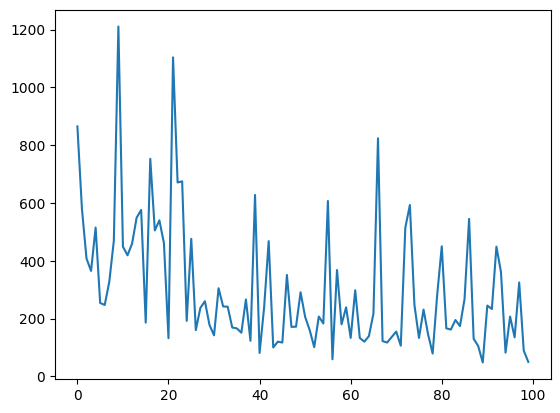

In [21]:
import matplotlib.pyplot as plt 
plt.plot(episode_lengths)

In [14]:
episode_rewards

[-120.92789473684208,
 -203.6047368421052,
 -679.9552631578947,
 -285.3257894736843,
 -428.20842105263193,
 -186.25631578947375,
 -736.1700000000005,
 -902.1299999999999,
 -490.0800000000002,
 -512.9352631578951,
 -119.68210526315784,
 -229.96210526315804,
 -269.1052631578947,
 -1072.8368421052626,
 -547.134736842106,
 -373.33105263157887,
 -396.6489473684211,
 -346.67789473684206,
 -348.72631578947346,
 -893.6936842105273,
 -586.3884210526321,
 -182.80052631578937,
 -313.1615789473681,
 -462.4652631578946,
 -293.9515789473683,
 -505.45052631579057,
 -1187.9184210526294,
 -1053.0831578947339,
 -222.61526315789462,
 -335.97105263157897,
 -293.47105263157897,
 -241.46000000000004,
 -268.3036842105264,
 -1651.1278947368464,
 -459.21631578947404,
 -293.22789473684225,
 -249.17526315789485,
 -327.7652631578949,
 -599.6847368421056,
 -297.3615789473682,
 -485.50789473684176,
 -361.32894736842076,
 -752.2494736842112,
 -134.49105263157887,
 -1211.3199999999956,
 -375.09000000000043,
 -419.188